In [139]:
import pandas as pd

In [140]:
''''''

''

In [141]:
file = 'data.xlsx'

In [142]:
df = pd.read_excel(file)

In [143]:
''''''

''

In [144]:
df = df.drop(columns = 'Unnamed: 5')

In [145]:
df = df.drop([0, 1])

In [146]:
df = df.dropna(subset=['client_id'])

In [147]:
df['client_id'] = pd.to_numeric(df['client_id'], errors='coerce').astype('Int64')

In [148]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format='%Y-%m-%d', errors='coerce')

In [149]:
df.dtypes

client_id                  Int64
sum                      float64
status                    object
sale                      object
new/current               object
document                  object
receiving_date    datetime64[ns]
dtype: object

In [150]:
''''''

''

В файле «data.xlsx» представлены данные по поступлению денежных средств от
клиентов компании N за покупку ее услуг.

In [151]:
df

,client_id,sum,status,sale,new/current,document,receiving_date
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15
...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08


● client_id - ID клиента;

● sum – сумма денежных средств;

● status – статус оплаты;

● sale – менеджер, заключивший сделку;

● new/current – статус сделки;

● document – наличие оригинала подписанного договора с клиентом;

● receiving_date – дата получения оригинала договора.

In [152]:
df.isna().sum()

client_id           0
sum                 0
status              0
sale                0
new/current         0
document           15
receiving_date    117
dtype: int64

# Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [165]:
july = df.query('receiving_date >= "2021-07-01" and receiving_date < "2021-08-01"')

In [167]:
july

,client_id,sum,status,sale,new/current,document,receiving_date
2,14,5452.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
5,18,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15
12,32,7353.90,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09
13,34,3892.52,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09
...,...,...,...,...,...,...,...
251,273,10133.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-07-06
252,277,4798.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-08
253,281,5733.70,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22
254,282,953.70,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16


In [168]:
july.status.unique()

array(['ОПЛАЧЕНО', 'ПРОСРОЧЕНО'], dtype=object)

In [172]:
round(df.query('status != "ПРОСРОЧЕНО"')['sum'].sum(), 2)

4728088.68

<h2> Ответ: 4 728 088.68 </h2>

# Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

Если за рассматриваемый период имеется в виду ИЮЛЬ, то посмотрим по дням месяца как изменялась выручака

In [176]:
july_clean = july.query('status != "ПРОСРОЧЕНО"')

In [180]:
july_revenue = july_clean.groupby('receiving_date').agg({'sum':'sum'})

In [181]:
import matplotlib.pyplot as plt

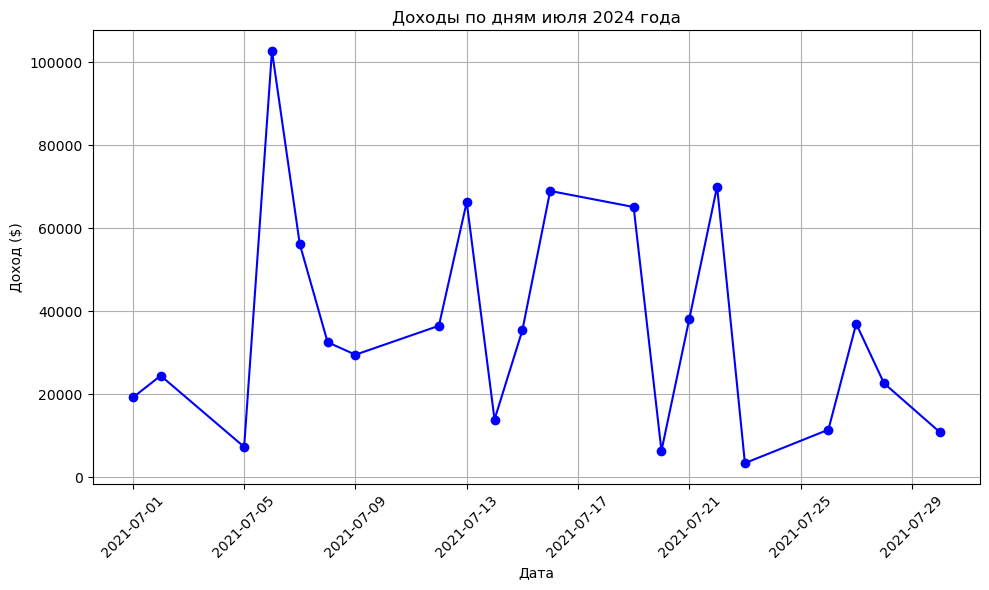

In [182]:
plt.figure(figsize=(10, 6))

plt.plot(july_revenue, marker='o', linestyle='-', color='b')

plt.title('Доходы по дням июля 2024 года')
plt.xlabel('Дата')
plt.ylabel('Доход ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [185]:
sep = df.query('receiving_date >= "2021-09-01" and receiving_date < "2021-10-01"')

In [192]:
sep_clean = sep.query('status != "ПРОСРОЧЕНО" and status != "В РАБОТЕ"')

In [195]:
sep_sales = sep_clean.groupby('sale', as_index=False).agg({'sum':'sum'}).sort_values('sum', ascending=False)

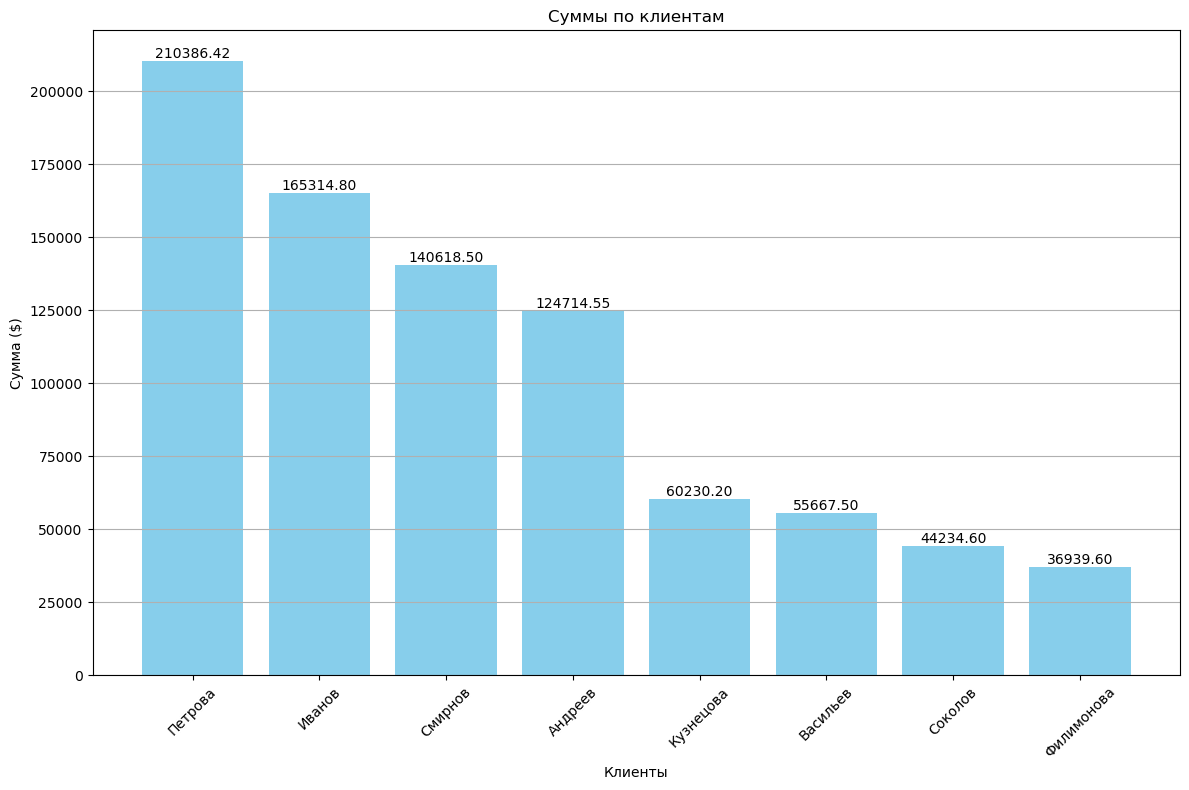

In [197]:
plt.figure(figsize=(12, 8))
bars = plt.bar(sep_sales['sale'], sep_sales['sum'], color='skyblue')

# Добавление подписей
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.title('Суммы по клиентам')
plt.xlabel('Клиенты')
plt.ylabel('Сумма ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h2> Ответ: Петрова </h2>

# Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [198]:
oct = df.query('receiving_date >= "2021-10-01" and receiving_date < "2021-11-01"')

In [199]:
oct

,client_id,sum,status,sale,new/current,document,receiving_date
7,21,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13
24,48,4452.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-10-08
139,31,6523.7,ОПЛАЧЕНО,Филимонова,новая,оригинал,2021-10-12
322,175,5328.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-04
337,228,2193.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-10-06
...,...,...,...,...,...,...,...
589,304,1313.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-13
590,285,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-10-05
591,285,4328.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-10-05
592,286,4078.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-10-20


In [200]:
oct.groupby('new/current').size()

new/current
новая       17
текущая    105
dtype: int64

<h2> Ответ: Tекущая    </h2>

# Сколько оригиналов договора по майским сделкам было получено в июне 2021?

Понятно что:
- дата получения договора отмечается колонкой receiving_date
- оригинал или неоригинал это document
- а что такое за МАЙСКИЕ СДЕЛКИ? (ни в таблице, ни в тз нет указаний или упоминаний о МАЙСКИХ СДЕЛКАХ)

In [202]:
df

,client_id,sum,status,sale,new/current,document,receiving_date
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15
...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08


In [203]:
# Поэтому посчитаем просто кол-во оригиналов
june = df.query('receiving_date >= "2021-06-01" and receiving_date < "2021-07-01"')

In [207]:
june.groupby('document').size()

document
оригинал    76
dtype: int64

# Задание:

In [209]:
july

,client_id,sum,status,sale,new/current,document,receiving_date
2,14,5452.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
5,18,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15
12,32,7353.90,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09
13,34,3892.52,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09
...,...,...,...,...,...,...,...
251,273,10133.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-07-06
252,277,4798.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-08
253,281,5733.70,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22
254,282,953.70,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16


In [210]:
def calculate_bonus(row):
    if row['new/current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО' and row['document'] == 'оригинал':
        return row['sum'] * 0.07
    elif row['new/current'] == 'текущая' and row['status'] != 'ПРОСРОЧЕНО' and row['document'] == 'оригинал':
        if row['sum'] > 10000:
            return row['sum'] * 0.05
        else:
            return row['sum'] * 0.03
    return 0

In [211]:
july['bonus'] = july.apply(calculate_bonus, axis=1)

C:\Users\tvoya\AppData\Local\Temp\ipykernel_16708\458443122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['bonus'] = july.apply(calculate_bonus, axis=1)


In [212]:
july

,client_id,sum,status,sale,new/current,document,receiving_date,bonus
2,14,5452.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,381.6890
5,18,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,127.6110
6,20,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,173.9010
12,32,7353.90,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09,220.6170
13,34,3892.52,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09,116.7756
...,...,...,...,...,...,...,...,...
251,273,10133.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-07-06,506.6850
252,277,4798.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-08,143.9610
253,281,5733.70,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22,172.0110
254,282,953.70,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16,66.7590


In [214]:
end_date = '2021-07-31'

In [215]:
outstanding_data = df[(df['receiving_date'] > end_date) | df['receiving_date'].isna()]

In [216]:
outstanding_data['bonus'] = outstanding_data.apply(calculate_bonus, axis=1)

C:\Users\tvoya\AppData\Local\Temp\ipykernel_16708\3454867322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outstanding_data['bonus'] = outstanding_data.apply(calculate_bonus, axis=1)


In [218]:
july_bonus = july.groupby('sale')['bonus'].sum().reset_index()

In [219]:
outstanding_bonus = outstanding_data.groupby('sale')['bonus'].sum().reset_index()

In [220]:
total_bonus = july_bonus.set_index('sale').add(outstanding_bonus.set_index('sale'), fill_value=0).reset_index()

In [222]:
# Бонусы по сделкам
total_bonus

,sale,bonus
0,Андреев,26175.9483
1,Васильев,6934.5985
2,Иванов,22254.2570
3,Кузнецова,16108.7711
4,Михайлов,607.0680
5,Петрова,27753.6542
6,Попов,0.0000
7,Селиванов,7102.4570
8,Смирнов,30073.1380
9,Соколов,3730.7090
